In [1]:
import numpy as np
import scipy
from scipy import stats, signal, fftpack
import matplotlib.pyplot as plt
%matplotlib inline

 - https://en.wikipedia.org/wiki/Wiener_deconvolution
 - https://gist.github.com/danstowell/f2d81a897df9e23cc1da
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.periodogram.html
 - https://dsp.stackexchange.com/questions/17871/how-to-calculate-signal-to-noise-ratio
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.signaltonoise.html

In [2]:
scipy.__version__

'1.3.1'

In [3]:
fs = 100
dt = 600
t = np.linspace(0, dt, dt*fs+1)
wnp = 1e-8

In [4]:
nt = np.random.randn(t.size)*wnp

In [5]:
xt = stats.norm(loc=20, scale=5).pdf(t)
xt.size

60001

In [6]:
gt = stats.lognorm(0.45, loc=-20, scale=100).pdf(t)
gt.size

60001

In [7]:
yt = signal.convolve(xt, gt, mode='full')
yt = yt[:t.size]/np.sum(yt[:t.size]/fs) + nt
yt.size

60001

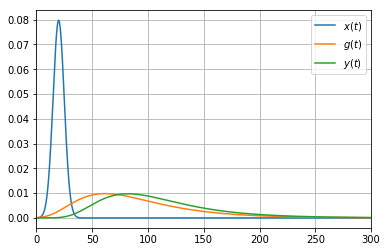

In [8]:
fig, axe = plt.subplots()
axe.plot(t, xt, label=r"$x(t)$")
axe.plot(t, gt, label=r"$g(t)$")
axe.plot(t, yt, label=r"$y(t)$")
axe.set_xlim([0,300])
axe.legend()
axe.grid()

In [9]:
Xs = fftpack.fft(xt)
Ys = fftpack.fft(yt)
fq = fs*fftpack.fftfreq(t.size)

In [10]:
N = fftpack.fft(nt)

In [11]:
Gs = (np.conj(Xs)*Ys)/(Xs*np.conj(Xs) + 1e-1)

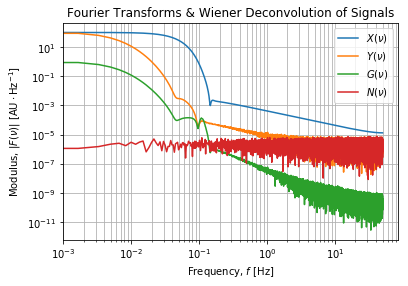

In [12]:
fig, axe = plt.subplots()
axe.loglog(fq[:t.size//2], np.abs(Xs)[:t.size//2], label=r"$X(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(Ys)[:t.size//2], label=r"$Y(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(Gs)[:t.size//2], label=r"$G(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(N)[:t.size//2], label=r"$N(\nu)$")
axe.set_title("Fourier Transforms & Wiener Deconvolution of Signals")
axe.set_xlabel(r"Frequency, $f$ $[\mathrm{Hz}]$")
axe.set_ylabel(r"Modulus, $|F(\nu)|$ $[\mathrm{AU\cdot Hz^{-1}}]$")
axe.legend()
axe.grid(which='both')

In [13]:
f, Pxx = signal.periodogram(xt, fs)
f, Pyy = signal.periodogram(yt, fs)
f, Pgg = signal.periodogram(gt, fs)
f, Pnn = signal.periodogram(nt, fs)

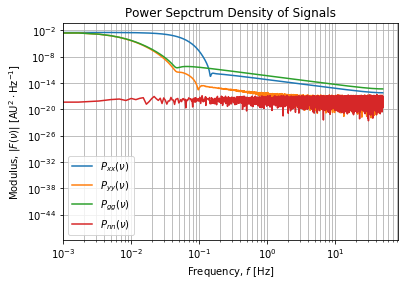

In [14]:
fig, axe = plt.subplots()
axe.loglog(f, Pxx, label=r"$P_{xx}(\nu)$")
axe.loglog(f, Pyy, label=r"$P_{yy}(\nu)$")
axe.loglog(f, Pgg, label=r"$P_{gg}(\nu)$")
axe.loglog(f, Pnn, label=r"$P_{nn}(\nu)$")
axe.set_title("Power Sepctrum Density of Signals")
axe.set_xlabel(r"Frequency, $f$ $[\mathrm{Hz}]$")
axe.set_ylabel(r"Modulus, $|F(\nu)|$ $[\mathrm{AU^2\cdot Hz^{-1}}]$")
axe.legend()
axe.grid(which='both')

In [15]:
SNR = Pyy/Pnn

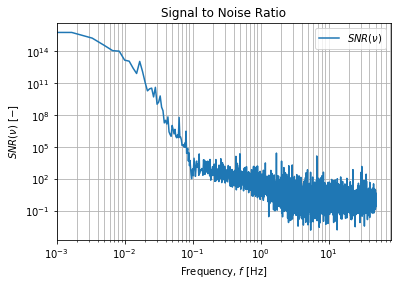

In [16]:
fig, axe = plt.subplots()
axe.loglog(f, SNR, label=r"$SNR(\nu)$")
axe.set_title("Signal to Noise Ratio")
axe.set_xlabel(r"Frequency, $f$ $[\mathrm{Hz}]$")
axe.set_ylabel(r"$SNR(\nu)$ $[-]$")
axe.legend()
axe.grid(which='both')

In [17]:
G = Pyy/(Pxx+Pnn)

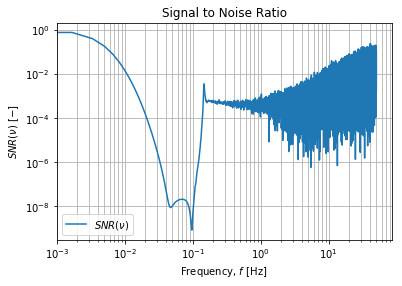

In [18]:
fig, axe = plt.subplots()
axe.loglog(f, G, label=r"$SNR(\nu)$")
axe.set_title("Signal to Noise Ratio")
axe.set_xlabel(r"Frequency, $f$ $[\mathrm{Hz}]$")
axe.set_ylabel(r"$SNR(\nu)$ $[-]$")
axe.legend()
axe.grid(which='both')

In [19]:
gti = fftpack.ifft(Gs)

In [20]:
gti

array([4.67022457e-07+1.40867884e-21j, 4.70258130e-07-2.97935002e-21j,
       4.73500803e-07+1.57746700e-21j, ...,
       4.57816426e-07+5.32224410e-21j, 4.60876429e-07-1.07800207e-20j,
       4.63942308e-07-9.43582451e-22j])

In [21]:
np.allclose(np.imag(gti), 0)

True

In [22]:
gti = np.real(gti)

In [23]:
gti = gti/(gti.sum()/fs)

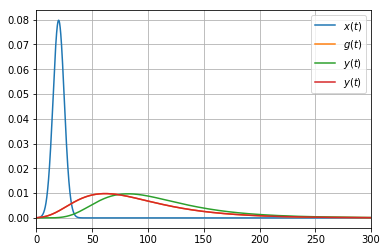

In [24]:
fig, axe = plt.subplots()
axe.plot(t, xt, label=r"$x(t)$")
axe.plot(t, gt, label=r"$g(t)$")
axe.plot(t, yt, label=r"$y(t)$")
axe.plot(t, gti, label=r"$y(t)$")
axe.set_xlim([0,300])
axe.legend()
axe.grid()

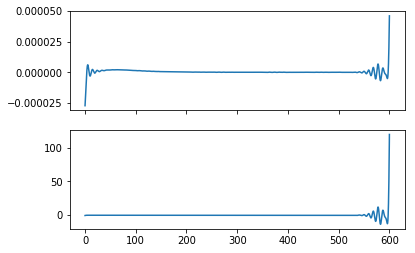

In [25]:
fig, axe = plt.subplots(2, 1, sharex=True)
axe[0].plot(t, gti-gt)
axe[1].plot(t, (gti-gt)/gt)

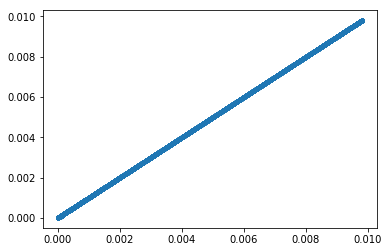

In [26]:
fig, axe = plt.subplots()
axe.plot(gt, gti, '.')